# Обзор и сравнение предпочтений авторов фанфиков в русско- и англоязычном фандоме Genshin Impact

## Содержание

**Импорт библиотек**
<br>**Введение: описание данных и контекста**
<br>**Пейринги**
<br>**Рейтинги**
<br>**Рейтинги в разрезе пейрингов**
<br>**Выводы**

## Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')

## Введение: описание данных и контекста

Исследуются фанфики по фандому `Genshin Impact` с двух сайтов:
+ `Archive of Our Own`, который принято сокращать как `AO3` (https://archiveofourown.org/) - самый крупный международный, преимущественно (но не только) англоязычный, сайт;
+ `Фикбук` (https://ficbook.net/) - самый крупный русскоязычный сайт фанфикшна

На каждом из сайтов для фандома `Genshin Impact` были распарсены **101 страница** (взято с запасом) последних фанфиков на **17.09.2022**. Для каждого сайта должны получиться выборки в ~2000 уникальных фиков - считаем очищенные данные и посмотрим, так ли это:

In [2]:
data_ao3 = pd.read_excel('ao3-genshin.xlsx').drop('Unnamed: 0', axis=1)
data_ao3.columns = ['name', 'rating', 'pairing']
display(data_ao3.head(20))
print(data_ao3.info())

,name,rating,pairing
0,Likewise | Diluc,General Audiences,Diluc/Reader
1,Risky Business,Mature,Tartaglia | Childe/Ying | Lumine
2,"I’ve handled the wood, but I still worship the...",General Audiences,Albedo/Kaeya
3,"I’ve handled the wood, but I still worship the...",General Audiences,Albedo & Traveler
4,"I’ve handled the wood, but I still worship the...",General Audiences,Diluc & Kaeya
5,"I’ve handled the wood, but I still worship the...",General Audiences,Albedo & Kaeya & Klee
6,Earth Grows As Water Erodes,Mature,Tartaglia | Childe/Zhongli
7,A Flower Without A Seed,Explicit,Baizhu & Reader
8,A Flower Without A Seed,Explicit,Baizhu/You
9,A Flower Without A Seed,Explicit,Baizhu and OC (You)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5302 entries, 0 to 5301
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     5302 non-null   object
 1   rating   5302 non-null   object
 2   pairing  5302 non-null   object
dtypes: object(3)
memory usage: 124.4+ KB
None


In [3]:
data_ficbook = pd.read_excel('ficbook-genshin.xlsx').drop('Unnamed: 0', axis=1)
data_ficbook.columns = ['name', 'rating', 'pairing']
display(data_ficbook.head(20))
print(data_ficbook.info())

,name,rating,pairing
0,Я... я типа Венти?,R,без пейринга
1,Echoes From The Abyss,R,без пейринга
2,Искатель,R,Итэр/Тарталья
3,Искатель,R,Джинн Гуннхильдр/Лиза Минчи
4,Искатель,R,Горо/Итто Аратаки
5,Искатель,R,Син Цю/Чун Юнь
6,Искатель,R,Бэй Доу/Нин Гуан
7,"Свет луны,освещал твои глаза.",PG-13,Бэй Доу/Нин Гуан
8,Пепельный реквием,NC-17,Люмин/Сяо
9,Пепельный реквием,NC-17,Джинн Гуннхильдр/Дилюк Рагнвиндр


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     4349 non-null   object
 1   rating   4349 non-null   object
 2   pairing  4349 non-null   object
dtypes: object(3)
memory usage: 102.1+ KB
None


In [4]:
print(f'Фикбук, количество фиков: {len(data_ficbook["name"].unique())}')
print(f'AO3, количество фиков: {len(data_ao3["name"].unique())}')

Фикбук, количество фиков: 2005
AO3, количество фиков: 2012


Для фикбука количество получилось чуть меньшим из-за специфики парсинга - но наши выборки по ~2000 уникальных фанфиков мы получили. В нашем распоряжении есть названия, рейтинги и пейринги - посмотрим, в чём схожи, а в чём различаются ру- и англофандом.

## Пейринги

Для начала просто посмотрим, какие пейринги на каждом из сайтов у нас есть - возьмём уникальные пейринги и отсортируем их по количеству по убывающей:

In [5]:
pairings_ao3 = pd.pivot_table(data_ao3, index='pairing', values='name', aggfunc='count').sort_values(
    by='name', ascending=False)
pairings_ao3.columns = ['count']
display(pairings_ao3.head(20))
print(pairings_ao3.info())

,count
pairing,
Tartaglia | Childe/Zhongli,199
no pairing,149
Diluc & Kaeya,120
Albedo/Kaeya,98
Tartaglia | Childe/Ying | Lumine,74
Kong | Aether/Xiao | Alatus,71
Diluc/Kaeya,69
Venti/Xiao | Alatus,68
Kamisato Ayato/Thoma,62


<class 'pandas.core.frame.DataFrame'>
Index: 1524 entries, Tartaglia | Childe/Zhongli to 鲸枫
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   1524 non-null   int64
dtypes: int64(1)
memory usage: 23.8+ KB
None


In [6]:
pairings_ficbook = pd.pivot_table(data_ficbook, index='pairing', values='name', aggfunc='count').sort_values(
    by='name', ascending=False)
pairings_ficbook.columns = ['count']
display(pairings_ficbook.head(20))
print(pairings_ficbook.info())

,count
pairing,
без пейринга,311
Дилюк Рагнвиндр/Кэйа Альберих,237
Тарталья/Чжун Ли,222
Итэр/Сяо,210
Венти/Сяо,163
Кадзуха Каэдэхара/Скарамучча,157
Син Цю/Чун Юнь,115
Люмин/Тарталья,111
Бэй Доу/Нин Гуан,90


<class 'pandas.core.frame.DataFrame'>
Index: 664 entries, без пейринга to фонРайдэн Эи/фонЯэ Мико
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   664 non-null    int64
dtypes: int64(1)
memory usage: 10.4+ KB
None


Уникальных пейрингов на `AO3` больше, однако на `AO3` существует опция `&` вместо `/`, на которой стоит остановиться поподробнее.

Под **пейрингом** в фандомах понимаются именно любовные взаимоотношения между персонажами - и обозначаются пейринги через `/`. И на `Фикбуке` можно обозначить либо пейринг, либо просто персонажей по отдельности, промежуточных вариантов нет - на `AO3` же есть вариант `&`, означающий, что описано взаимодействие (дружеские отношения, семейные, какие-либо НЕ любовные) между персонажами.

Вернёмся к нашим данным и пока что остановимся на первой тройке. Она в целом похожа: есть определённое количество фиков без пейринга, причём на `Фикбуке` их больше. Есть именно пейринг Тартали (`Тарталья/Чжун Ли`, он же `Tartaglia/Zhongli`) - популярный в обоих фандомах. 

И есть Дилюк и Кэйа - однако здесь мы должны сказать, что ру-фандом предпочитает именно пейринг, в то время как англофандом пишет о взаимодействии. То есть оба фандома любят писать **о** Дилюке и Кэйе, эти персонажи популярны - но пишут о них по-разному. Подробнее этот момент мы рассмотрим, когда будем рассматривать рейтинги.

Сейчас же визуализируем первую десятку для каждого фандома: 

In [7]:
def two_barhs(data_ao3, data_ficbook, column):
    fig, axes = plt.subplots(ncols=2, sharey=False, figsize=(20, 18))
    axes[0].barh(data_ao3.index, data_ao3[column], color='blue', align='center')
    axes[0].set(title='AO3')
    axes[1].barh(data_ficbook.index, data_ficbook[column], color='red', align='center')
    axes[1].set(title='Фикбук')
    
    for i in range(0, 2):
        axes[i].invert_yaxis()
        axes[i].xaxis.set_tick_params(labelsize=24)
        axes[i].yaxis.set_tick_params(labelsize=28)
        axes[i].title.set_size(30)
    axes[0].invert_xaxis()
    axes[1].yaxis.tick_right()
    axes[0].yaxis.tick_left()
    
    plt.show()

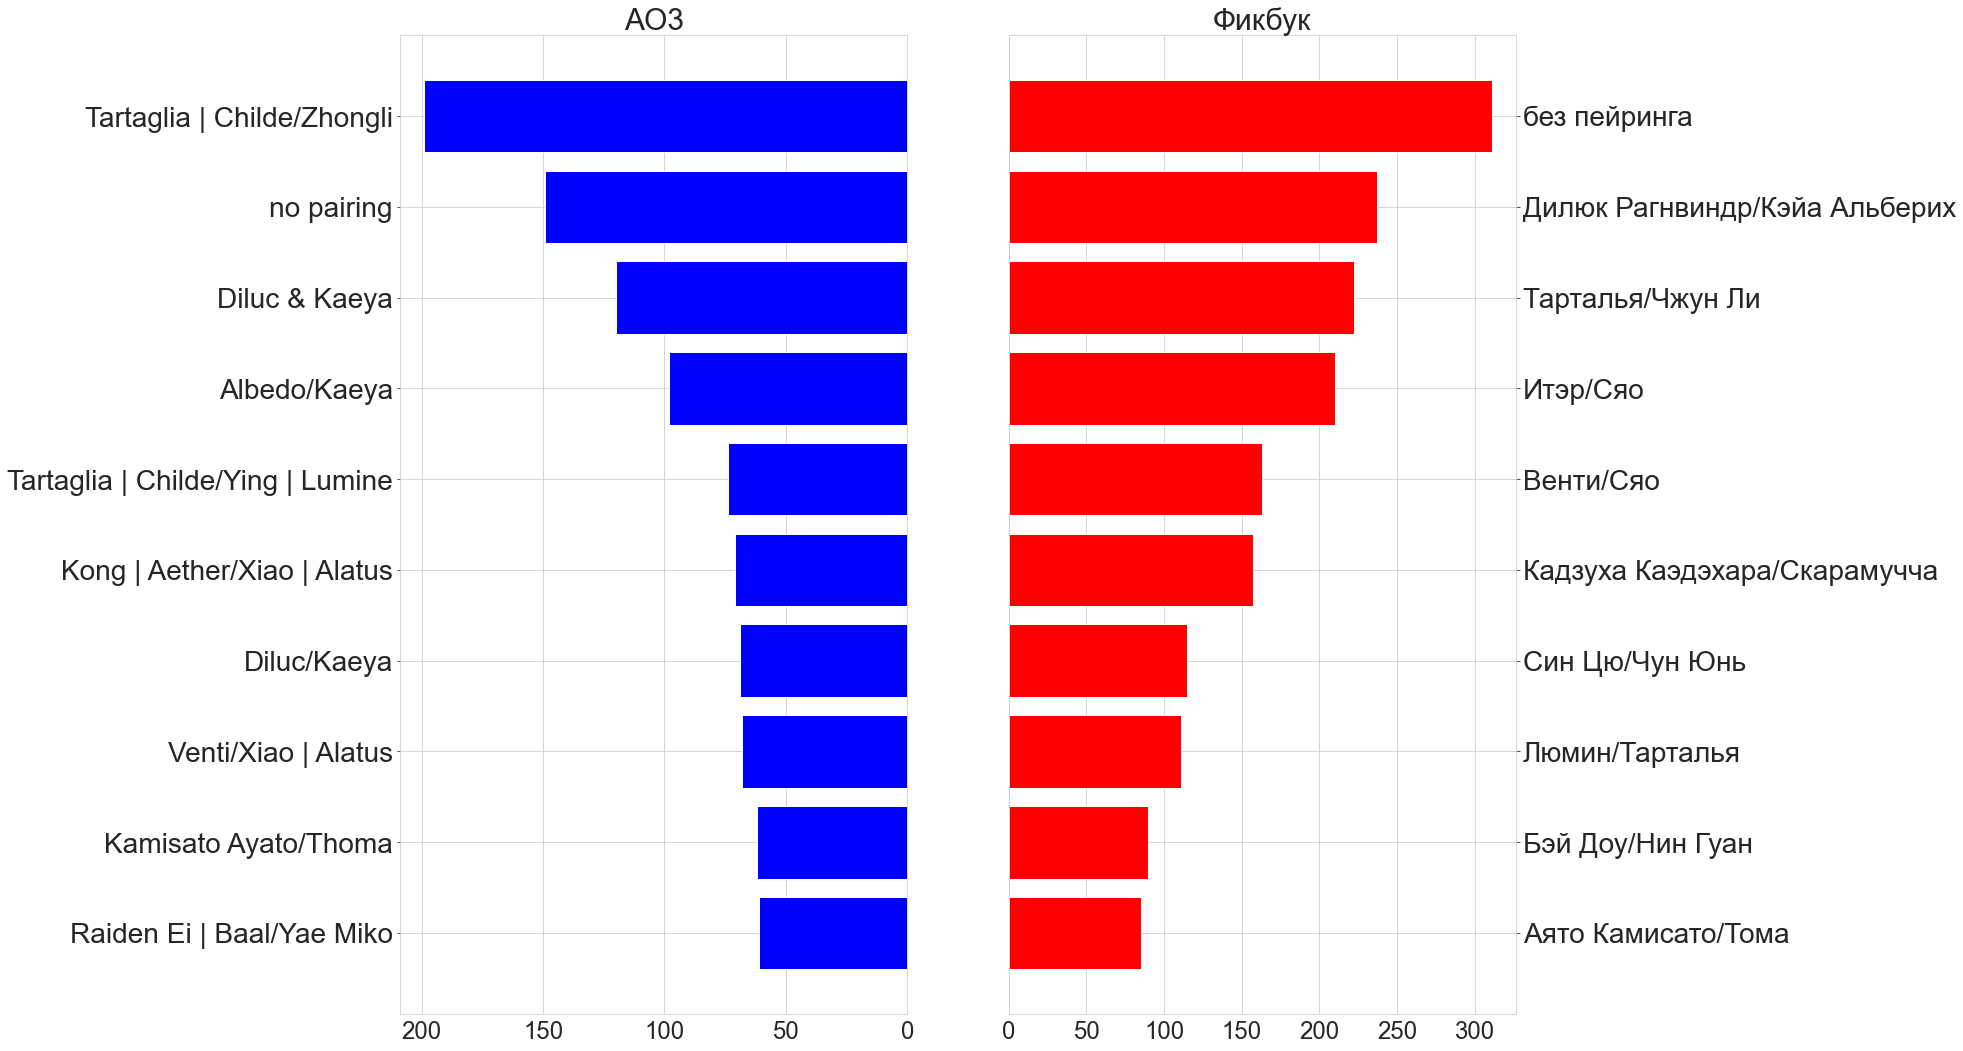

In [8]:
ao3_pairs_top10 = pairings_ao3.head(10)
ficbook_pairs_top10 = pairings_ficbook.head(10)

two_barhs(ao3_pairs_top10, ficbook_pairs_top10, 'count')

Стоит заметить, что в целом они схожи. Самым любопытным отличием, пожалуй, является популярность пейринга Альбедо/Кэйа (`'Albedo/Kaeya`) в англофандоме - в то время как в руфандоме он не входит и в первую двадцатку. То есть Альбедо/Кэйа достаточно популярен в англофандоме, но руфандому он не зашёл практически вообще - ситуация достаточно редкая.

Популярные у руфандома `Итер/Сяо` и `Венти/Сяо` входят и в первую десятку англофандома: `Kong | Aether/Xiao | Alatus` и `Venti/Xiao | Alatus` соответственно. Только вместо 4-го и 5-го места они занимают 6-ое и 8-е. Англофандомоское 5-ое `Tartaglia | Childe/Ying | Lumine` соответствует руфандомовскому 8-му `Тарталья/Люмин`, это один пейринг. `Аято Камисато/Тома` у англофандома на 9-м месте, а у ру - на 10-м.

В англофандоме есть так же и `Diluc/Kaeya` - именно пейринг Дилюка и Кэйи, идущий отдельной категорией. Пейринг `Эи/Яэ Мико` вышел у англофандома на последнее место, а у руфандома в десятку не вошёл, но есть в его двадцатке. Это справедливо и для руфандомных пейрингов: те из них, что не вошли в англофандомную десятку, входят в его двадцатку.

То есть можно сказать, что сильно выбивается лишь упомянутый ранее Альбедо/Кэйа.

Зафиксируем всё это - и перейдём к рейтингам.

## Рейтинги

Сначала просто сгруппируем фанфики по рейтингам - и отсортируем по количеству по убывающей:

In [9]:
ratings_ao3 = pd.pivot_table(data_ao3, index='name', values=['rating', 'pairing'], aggfunc='first')
ratings_ao3 = pd.pivot_table(ratings_ao3, index='rating', values='pairing', aggfunc='count').sort_values(
    by='pairing', ascending=False)
ratings_ao3.columns = ['count']
display(ratings_ao3)

,count
rating,
Teen And Up Audiences,585
General Audiences,420
Explicit,418
Mature,349
Not Rated,240


In [10]:
ratings_ficbook = pd.pivot_table(data_ficbook, index='name', values=['rating', 'pairing'], aggfunc='first')
ratings_ficbook = pd.pivot_table(ratings_ficbook, index='rating', values='pairing', aggfunc='count').sort_values(
    by='pairing', ascending=False)
ratings_ficbook.columns = ['count']
display(ratings_ficbook)

,count
rating,
NC-17,759
PG-13,513
R,439
G,172
NC-21,122


Сразу видно интересное - немного остановимся на том, что вообще происходит.

Рейтинг текста в фандомах означает по факту ровно то же, что рейтинг фильмов - не случайно на Фикбуке используется по сути система рейтингов Американской киноассоциации. Низкий рейтинг означает "безобидный текст" - высокий же означает, что в тексте присутствуют графические описания жестокости и/или секса. Рассмотрим градацию подробнее:

+ `G` Фикбука = `General Audiences` AO3: безобидные тексты, которые можно читать всем в любом настроении;
+ `PG-13` Фикбука = `Teen And Up Audiences` AO3: тексты для аудитории 13+, то есть тексты, в которых могут встречаться упоминания жестокости, но не графичные, всё аккуратно;
+ `R` Фикбука = `Mature` AO3: тексты для аудитории 16+, то есть тексты, в которых могут встречаться жестокость, курение, обсценная лексика и прочее;
+ `NC-17/NC-21` Фикбука = `Explicit` AO3: здесь чуть сложнее. На AO3 весь высокий рейтинг, то есть откровенные описания жестокости и/или секса, объединён в категорию `Explicit`. На Фикбуке такие тексты делятся на `NC-17` (условно "жесть, но всё же ещё не полная") и `NC-21` (полная жесть: например, некрофилия) 

Также на AO3 есть категория `Not Rated` - автор не поставил рейтинг. На Фикбуке такой опции нет, рейтинг должен стоять обязательно.

Уже по числам видно, что высокого рейтинга на Фикбуке больше - визуализируем это. Построим пайплоты для обоих сайтов, заменив рейтинги AO3 рейтингами Фикбука для наглядности и удобства. Также определимся с цветовой шкалой: будем идти от красного к зелёному, где красный отвечает за самый высокий рейтинг, а зелёный - за самый низкий (исключение - `NC-21`, его обозначим циановым, как `Not Rated` на AO3):

In [11]:
rating_ao3_list = ratings_ao3.index
ratings_ficbook_list = ratings_ficbook.index
ratings_ao3.index = ['PG-13', 'G', 'NC-17/NC-21', 'R', 'Not Rated']

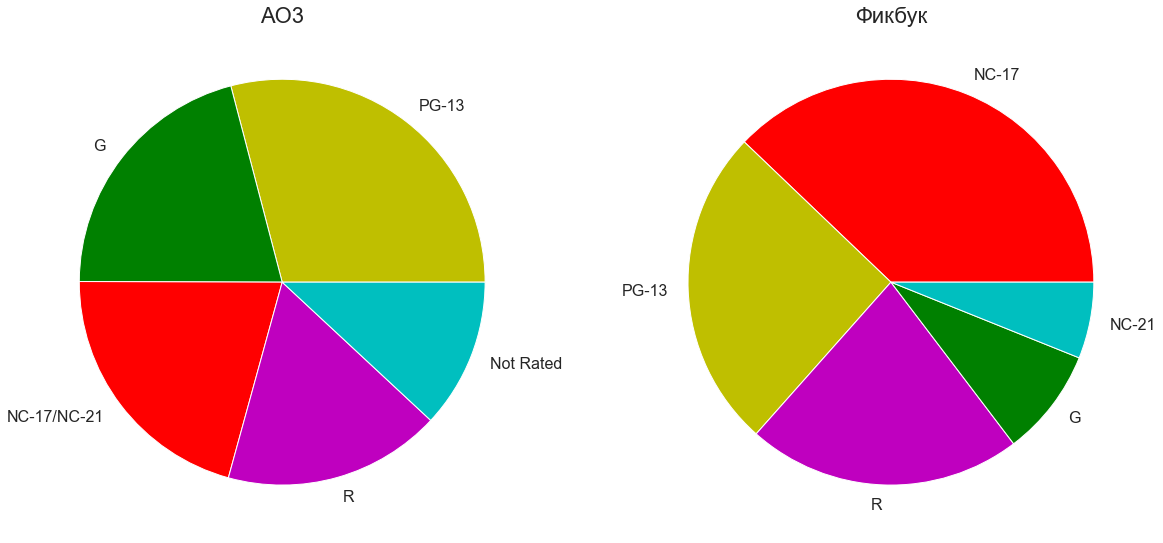

In [12]:
colors = {'NC-17': 'r', 'NC-17/NC-21': 'r', 'R': 'm', 'PG-13': 'y', 
          'G': 'g', 'Not Rated': 'c', 'NC-21': 'c'}
fig, axes = plt.subplots(ncols=2, sharey=False, figsize=(20, 16))
axes[0].pie(ratings_ao3['count'], labels=ratings_ao3.index,
        colors=[colors[c] for c in ratings_ao3.index], textprops={'fontsize': 16})
axes[0].set(title='AO3')
axes[0].title.set_size(22)
axes[1].pie(ratings_ficbook['count'], labels=ratings_ficbook.index, 
        colors=[colors[c] for c in ratings_ficbook.index], textprops={'fontsize': 16})
axes[1].set(title='Фикбук')
axes[1].title.set_size(22)
plt.show()

Видно, что даже если мы предположим, что все фики без рейтинга на AO3 - это высокий рейтинг, доля высокого (`R`, `NC-17`, `NC-21`) рейтинга на Фикбуке всё равно будет заметно выше. То есть ру-фандом предпочитает писать тексты высокого рейтинга - и здесь лежит его отличие от англофандома (признаться, оказавшееся неожиданным :)).

## Рейтинги в разрезе пейрингов

Покрутим таблички: для каждого пейринга посчитаем количество фиков отдельно для каждого рейтинга:

In [13]:
def rating_bar(data, plot_name):
    width = 0.1
    colors = ['r','m', 'y', 'g', 'c']
    count = 0
    
    X_axis = np.arange(len(data.index))
    
    plt.figure(figsize=(20, 10))
    for column in data:
        plt.bar(X_axis + count*width, data[column], color = colors[count],
                width = width, edgecolor = 'black',
                label=column)
        count += 1
        
    plt.xticks(X_axis, data.index, fontsize=18, ha='left')
    plt.yticks(fontsize=18)
    plt.title(plot_name, fontsize=20)    
    plt.legend(loc='upper right', fontsize=18)
    plt.show()

In [14]:
ao3_splitted = pd.pivot_table(data_ao3, values='name', index='pairing', columns='rating', aggfunc='count')
ao3_splitted = ao3_splitted.join(pairings_ao3).sort_values(by='count', ascending=False).fillna(0).astype(
    'int64').drop('count', axis=1)
display(ao3_splitted.head(10))

,Explicit,General Audiences,Mature,Not Rated,Teen And Up Audiences
pairing,,,,,
Tartaglia | Childe/Zhongli,41,23,47,29,59
no pairing,13,42,15,27,52
Diluc & Kaeya,8,21,16,15,60
Albedo/Kaeya,11,23,15,10,39
Tartaglia | Childe/Ying | Lumine,11,9,17,8,29
Kong | Aether/Xiao | Alatus,8,12,18,13,20
Diluc/Kaeya,31,13,10,2,13
Venti/Xiao | Alatus,9,13,11,16,19
Kamisato Ayato/Thoma,18,5,17,6,16


In [15]:
ficbook_splitted = pd.pivot_table(data_ficbook, values='name', index='pairing', columns='rating', aggfunc='count')
ficbook_splitted = ficbook_splitted.join(pairings_ficbook).sort_values(by='count', ascending=False).fillna(0).astype(
    'int64').drop('count', axis=1)
display(ficbook_splitted.head(10))

,G,NC-17,NC-21,PG-13,R
pairing,,,,,
без пейринга,63,68,27,83,70
Дилюк Рагнвиндр/Кэйа Альберих,7,109,9,52,60
Тарталья/Чжун Ли,8,98,14,55,47
Итэр/Сяо,8,90,15,53,44
Венти/Сяо,11,65,8,47,32
Кадзуха Каэдэхара/Скарамучча,7,75,12,28,35
Син Цю/Чун Юнь,8,37,3,35,32
Люмин/Тарталья,4,51,8,22,26
Бэй Доу/Нин Гуан,5,38,2,27,18


И построим графики первых пятёрок для каждого сайта. Как и раньше, градация рейтингов идёт от красного цвета (высокие рейтинги) к зелёному (низкие):

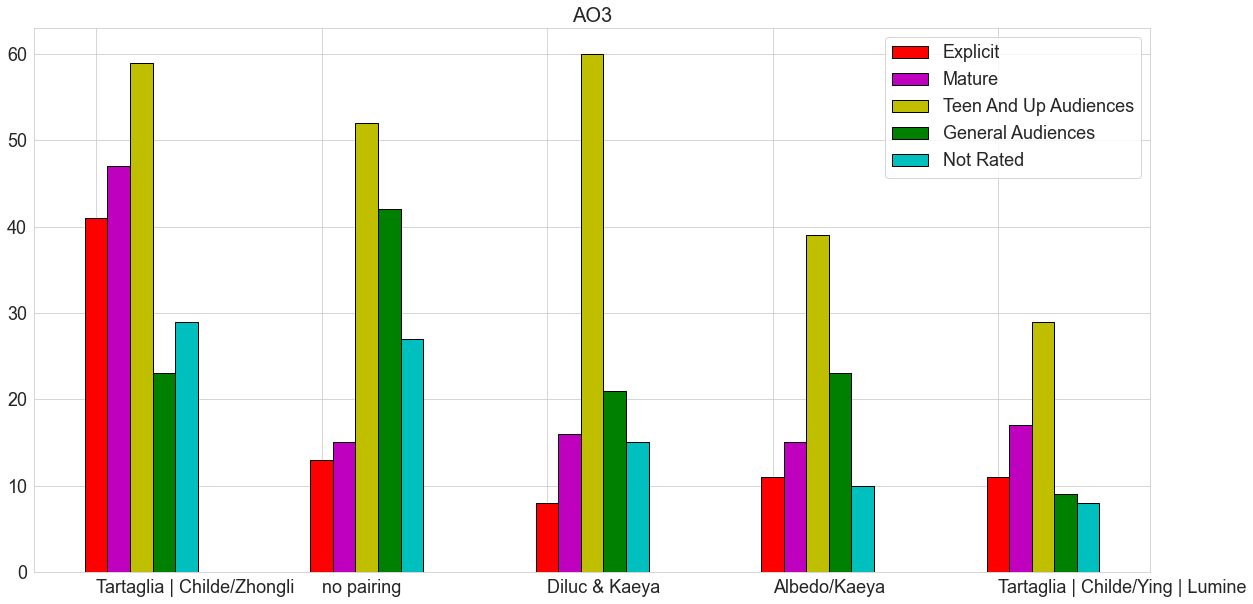

In [16]:
ao3_splitted = ao3_splitted[['Explicit', 'Mature', 'Teen And Up Audiences', 'General Audiences', 'Not Rated']]
rating_bar(ao3_splitted.head(5), 'AO3')

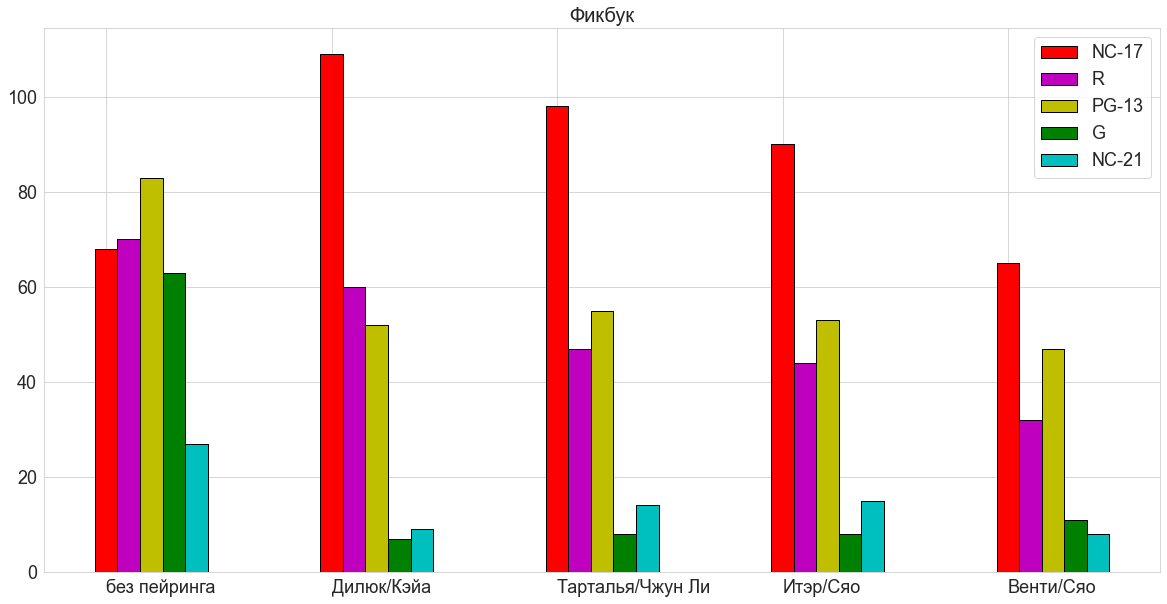

In [17]:
ficbook_splitted = ficbook_splitted[['NC-17', 'R', 'PG-13', 'G', 'NC-21']]
ficbook_splitted_plot = ficbook_splitted.head(5).rename(index={'Дилюк Рагнвиндр/Кэйа Альберих':'Дилюк/Кэйа'})
rating_bar(ficbook_splitted_plot, 'Фикбук')

В разрезе видно то же, что и на целом: англофандом предпочитает более "мягкие" тексты, в то время как в руфандоме пишут много высокого рейтинга. Впрочем, в `Тарталье/Чжун ли` высокого не чурается и англофандом - но всё равно в меньшей степени, чем руфандом.

И здесь было бы интересно посмотреть на "аномалии". Возьмём топ-20 пейрингов по количеству для обоих сайтов и:
+ для `AO3`: из этих топ-20 возьмём топ-10 с наибольшим процентным отношением **высокорейтинговых (`Explicit` + `Mature`)** текстов;
+ для `Фикбука` наоборот: из топ-20 возьмём топ-10 с наибольшим процентным отношением **низкорейтинговых (`G` + `PG-13`)** текстов
Поехали:

In [18]:
ao3_splitted_frac = ao3_splitted.join(pairings_ao3).sort_values(by='count', ascending=False)
ao3_splitted_frac['frac%'] = np.round(
    ((ao3_splitted_frac['Explicit'] + ao3_splitted_frac['Mature']) / ao3_splitted_frac['count']) * 100, decimals=1)
ao3_splitted_frac = ao3_splitted_frac[['Explicit', 'Mature', 'count', 'frac%']].head(20).sort_values(
    by='frac%', ascending=False).head(10)
display(ao3_splitted_frac)

,Explicit,Mature,count,frac%
pairing,,,,
Diluc/Reader,15,10,41,61.0
Diluc/Kaeya,31,10,69,59.4
Tartaglia | Childe/Reader,16,10,45,57.8
Kamisato Ayato/Thoma,18,17,62,56.5
Tartaglia | Childe/Zhongli,41,47,199,44.2
Xiao | Alatus/Reader,9,6,36,41.7
Tartaglia | Childe/Ying | Lumine,11,17,74,37.8
Kong | Aether/Xiao | Alatus,8,18,71,36.6
Cyno/Tighnari,7,6,42,31.0


И здесь мы видим, что если англофандом пишет Дилюк/Кэйа именно как пейринг, через слэш, то высокого рейтинга он не чурается. А также вылезла специфика англофандома: фики `некий персонаж/читатель`, которых в руфандоме в целом практически нет, нет этого тренда. Есть фики с ОЖП и ОМП (Оригинальный Женский Персонаж и Оригинальный Мужской Персонаж) - однако это всё же другое и, что любопытно, для Геншина такие фики по популярности в топ-20 вообще не вошли.

Посмотрим, что там с низким рейтингом на Фикбуке:

In [19]:
ficbook_splitted_frac = ficbook_splitted.join(pairings_ficbook).sort_values(by='count', ascending=False)
ficbook_splitted_frac['frac%'] = np.round(
    ((ficbook_splitted_frac['G'] + ficbook_splitted_frac['PG-13']) / ficbook_splitted_frac['count']) * 100, decimals=1)
ficbook_splitted_frac = ficbook_splitted_frac[['G', 'PG-13', 'count', 'frac%']].head(20).sort_values(
    by='frac%', ascending=False).head(10)
display(ficbook_splitted_frac)

,G,PG-13,count,frac%
pairing,,,,
без пейринга,63,83,311,46.9
Альбедо/Сахароза,2,17,43,44.2
Джинн Гуннхильдр/Лиза Минчи,7,23,76,39.5
Син Цю/Чун Юнь,8,35,115,37.4
Венти/Сяо,11,47,163,35.6
Бэй Доу/Нин Гуан,5,27,90,35.6
Ху Тао/Янь Фэй,3,18,61,34.4
Гань Юй/Кэ Цин,2,17,63,30.2
Альбедо/Итэр,6,8,48,29.2


Проценты всё равно ниже, чем в англофандоме, и побеждают тут тексты без пейринга в принципе - что ожидаемо. Из самых популярных пейрингов же сравнительно низкорейтинговыми в процентном соотношении являются `Венти/Сяо` и `Итэр/Сяо`, что любопытно.

## Выводы

В разрезе пейрингов предпочтения ру- и англофандома в целом можно назвать достаточно схожими: и тем, и другим нравится писать Тартали (`Тарталья/Чжун ли`), а также о Дилюке с Кэйей. Затем, на чуть разных позициях, идут `Тарталья/Люмин`, `Итер/Сяо` и `Венти/Сяо`. Заметно выбивается лишь `Альбедо/Кэйа`, который достаточно популярен в англофандоме, но слабо заинтересовал русскоязычную аудиторию.

А вот разница в пейрингах заметна - в ру-сегмента заметно преобладают тексты высокого рейтинга, что видно и в целом, и в раскладке по позициям. В ру-фандоме из популярных пейрингов сравнительно низкорейтинговыми в процентном отношении являются `Венти/Сяо` и `Итер/Сяо` - высокий рейтинг в англофандоме обнаруживается в Тартали, `Дилюк/Кэйа` именно как пейринге, в текстах с пейрингом "персонаж/читатель" и (внезапно) в `Камисато Аято/Тома`.